## SIFT Matcher

In [12]:
import math
import numpy as np
import sys

import cv2
import matplotlib.pyplot as plt

In [13]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [14]:
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [15]:
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

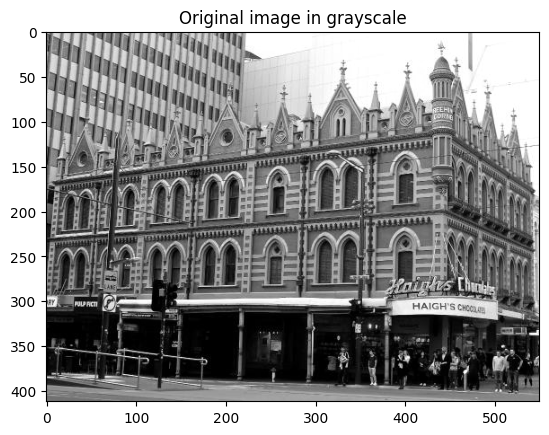

In [16]:
# read in the image, convert it to gray scale
img = cv2.imread('Beehive_Corner_Adelaide.png', -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("Original image in grayscale")
plt.imshow(gray, "gray")
plt.show()

number of keypoints= 3615


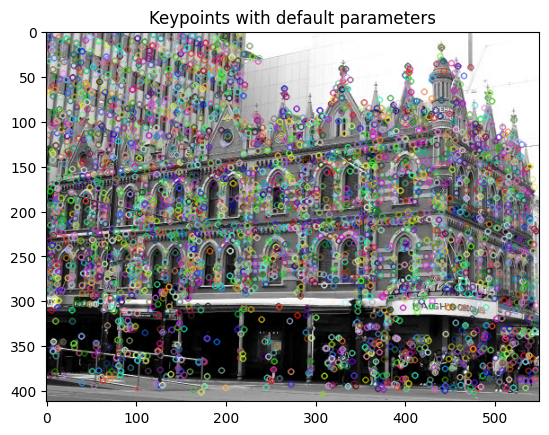

In [17]:
sift = SiftDetector()
img = cv2.imread('Beehive_Corner_Adelaide.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kpt, desc = sift.detector.detectAndCompute(gray, None)
img = cv2.drawKeypoints(gray, kpt, gray)
print("number of keypoints=", len(kpt))
plt.title("Keypoints with default parameters")
plt.imshow(img, "gray")
plt.show()

number of keypoints= 363


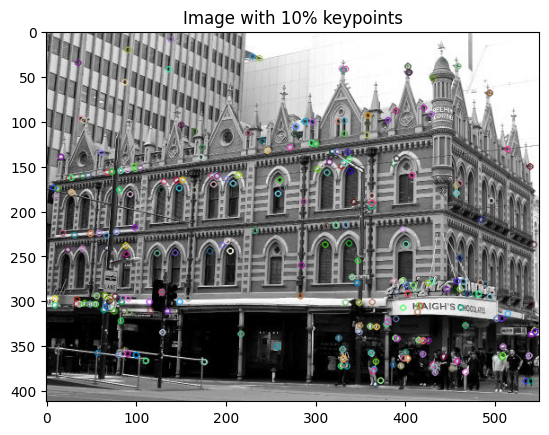

In [18]:
# update the parameters to better visualize the key points
param = {
    "n_features":0,
    "n_octave_layers":3,
    "contrast_threshold":0.1618, 
    "edge_threshold":10,
    "sigma":1.6
}
sift = SiftDetector(params=param)
img = cv2.imread('Beehive_Corner_Adelaide.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kpt1, desc1 = sift.detector.detectAndCompute(gray, None)
img = cv2.drawKeypoints(gray, kpt1, gray)
print("number of keypoints=", len(kpt1))
plt.title("Image with 10% keypoints")
plt.imshow(img, "gray")
plt.show()

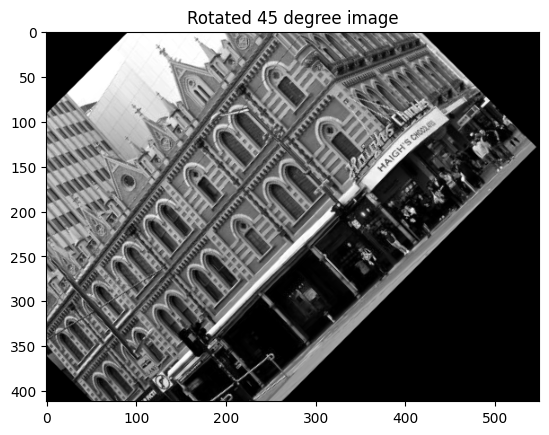

In [19]:
image = cv2.imread('Beehive_Corner_Adelaide.png')
gray_rotate = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
center = get_img_center(gray_rotate)
gray_rotate = rotate(gray_rotate, center[0], center[1], 45)
plt.title("Rotated 45 degree image")
plt.imshow(gray_rotate, "gray")
plt.show()

number of keypoints= 266
Keypoint 0 coordinate (3.4583566188812256, 90.55332946777344)
Descriptor shape (266, 128)


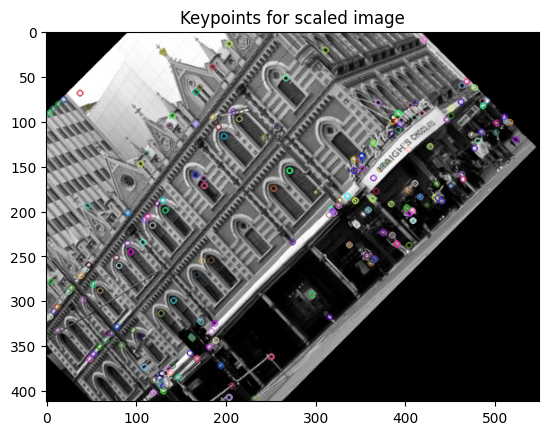

In [20]:
sift = SiftDetector(params=param)
kpt2, desc2 = sift.detector.detectAndCompute(gray_rotate, None)
img2 = cv2.drawKeypoints(gray_rotate, kpt2, gray_rotate)
print("number of keypoints=", len(kpt2))
print('Keypoint 0 coordinate', kpt2[0].pt)
print('Descriptor shape', desc2.shape)
plt.title("Keypoints for scaled image")
plt.imshow(img2, "gray")
plt.show()

length of matches object 266, matches object ((< cv2.DMatch 0x78e74becb350>, < cv2.DMatch 0x78e7494e12b0>), (< cv2.DMatch 0x78e7494e3d90>, < cv2.DMatch 0x78e749617190>), (< cv2.DMatch 0x78e7496170f0>, < cv2.DMatch 0x78e749617b70>), (< cv2.DMatch 0x78e749617770>, < cv2.DMatch 0x78e749614bb0>), (< cv2.DMatch 0x78e7496172b0>, < cv2.DMatch 0x78e7496155b0>), (< cv2.DMatch 0x78e749617670>, < cv2.DMatch 0x78e749614550>), (< cv2.DMatch 0x78e7496144d0>, < cv2.DMatch 0x78e749617370>), (< cv2.DMatch 0x78e7496151d0>, < cv2.DMatch 0x78e749614470>), (< cv2.DMatch 0x78e749617730>, < cv2.DMatch 0x78e749617410>), (< cv2.DMatch 0x78e7496171d0>, < cv2.DMatch 0x78e749615470>), (< cv2.DMatch 0x78e749615810>, < cv2.DMatch 0x78e7496145d0>), (< cv2.DMatch 0x78e749614fd0>, < cv2.DMatch 0x78e749614190>), (< cv2.DMatch 0x78e749614330>, < cv2.DMatch 0x78e749616e90>), (< cv2.DMatch 0x78e749614950>, < cv2.DMatch 0x78e749616f30>), (< cv2.DMatch 0x78e749617c30>, < cv2.DMatch 0x78e749617b50>), (< cv2.DMatch 0x78e74961

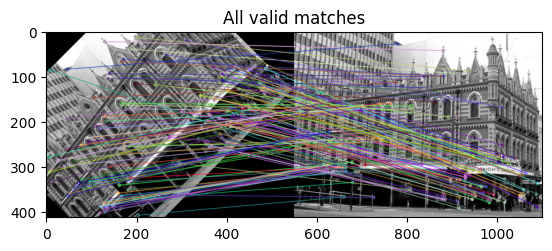

matching 0, coordinate on the query image (104.00260925292969,338.9140319824219), coordinate on the train image (638.9501953125,247.9359130859375)
matching 1, coordinate on the query image (166.49441528320312,159.66688537597656), coordinate on the train image (809.8515625,165.42210388183594)
matching 2, coordinate on the query image (385.67816162109375,99.91220092773438), coordinate on the train image (1007.1807861328125,278.0640563964844)
matching 3, coordinate on the query image (191.67478942871094,106.37350463867188), coordinate on the train image (865.1936340332031,145.44381713867188)
matching 4, coordinate on the query image (362.4350280761719,254.29002380371094), coordinate on the train image (881.4985961914062,370.98883056640625)


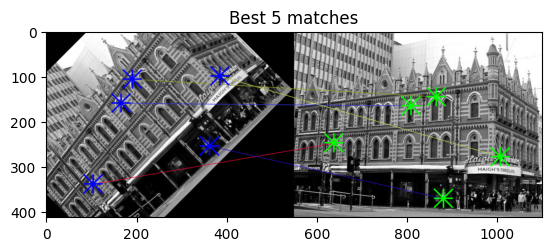

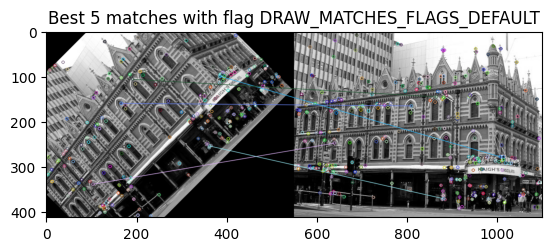

In [21]:
bf = cv2.BFMatcher()
# query image and train image
matches = bf.knnMatch(desc2, desc1, k=2)
print(f'length of matches object {len(matches)}, matches object {matches}')
# ratio test
good = []
for m, n in matches:
    print(f'best-match point index ({m.trainIdx}, {m.queryIdx}), second best match point index ({n.trainIdx}, {n.queryIdx})')
    if m.distance < 0.8 * n.distance:
        good.append([m])
good = sorted(good,key = lambda x:x[0].distance)
img3 = cv2.drawMatchesKnn(gray_rotate, kpt2, gray, kpt1, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.title("All valid matches")
plt.imshow(img3)
plt.show()
cv2.imwrite('knn-2.png', img3)
# Draw first 5 matches.
img4 = cv2.drawMatchesKnn(gray_rotate,kpt2, gray,kpt1,good[:5], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img5 = cv2.drawMatchesKnn(gray_rotate,kpt2, gray,kpt1,good[:5], None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
for i in range(5):
    queryX, queryY = kpt2[good[i][0].queryIdx].pt[0], kpt2[good[i][0].queryIdx].pt[1]
    trainX, trainY = kpt1[good[i][0].trainIdx].pt[0], kpt1[good[i][0].trainIdx].pt[1]
    print(f'matching {i}, coordinate on the query image ({queryX},{queryY}), coordinate on the train image ({trainX+gray_rotate.shape[1]},{trainY})')
    cv2.drawMarker(img4, (int(queryX), int(queryY)),(0,0,255), markerType=cv2.MARKER_STAR, markerSize=40, thickness=2, line_type=cv2.LINE_AA)
    cv2.drawMarker(img4, (int(trainX+gray_rotate.shape[1]), int(trainY)),(0,255,0), markerType=cv2.MARKER_STAR, markerSize=40, thickness=2, line_type=cv2.LINE_AA)
plt.title("Best 5 matches")
plt.imshow(img4)
plt.show()
plt.title("Best 5 matches with flag DRAW_MATCHES_FLAGS_DEFAULT")
plt.imshow(img5)
plt.show()


In [22]:
cv2.imwrite('best-5.png', img4)

True